In [58]:
import pandas as pd
import numpy as np
import gensim
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('netflix_fb_comments.csv')

In [4]:
df.head()

,PostID,UserID,UserName,Comment,Timestamp,Datasource
0,74711,356206,Raymond Stewart,Why isn't everyone talking about Daybreak? it ...,2021-08-26 14:03:32,facebook
1,47187,982942,Nichole Bradley,The CGI in Tiny Pretty Things is groundbreakin...,2021-03-26 23:20:31,facebook
2,76102,122557,Jamie Shields,The characters in Gentefied are wonderfully de...,2024-06-16 10:58:13,facebook
3,106953,662365,Summer Mahoney,I wish the supporting character from Ragnarok ...,2022-06-09 19:00:48,facebook
4,50247,750006,Barbara Webb,Netflix really knows how to tell a story with ...,2021-12-12 18:08:42,facebook


In [5]:
df = df[['UserName','Comment']]

In [8]:
df

,UserName,Comment
0,Raymond Stewart,Why isn't everyone talking about Daybreak? it ...
1,Nichole Bradley,The CGI in Tiny Pretty Things is groundbreakin...
2,Jamie Shields,The characters in Gentefied are wonderfully de...
3,Summer Mahoney,I wish the supporting character from Ragnarok ...
4,Barbara Webb,Netflix really knows how to tell a story with ...
...,...,...
119995,Timothy Lewis,Would love to see a crossover between Locke & ...
119996,Joshua Sanders,Netflix's recommendation algorithm is spot on!...
119997,Helen Shaw,I’ve never seen anything like Cheer. it's trul...
119998,Jennifer Miles,Watching Atypical in one sitting was an emotio...


In [26]:
lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['Comment'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    # print(review)
    review = ' '.join(review)
    corpus.append(review)

In [28]:
corpus

['everyone talking daybreak break new ground',
 'cgi tiny pretty thing groundbreaking actor outshine others',
 'character gentefied wonderfully developed actor outshine others',
 'wish supporting character ragnarok screen time potential',
 'netflix really know tell story last kingdom beautifully crafted',
 'believe people watching sense need recognition',
 'bridgerton hand best netflix series plot twist keep edge seat',
 'wait talk luke cage everyone share experience',
 'character arc lockwood co beautifully developed every character feel real',
 'anyone else feel like gentefied ended soon controversial',
 'netflix keep producing hit like ozark cast phenomenal',
 'slow burn politician inconsistent see coming',
 'character development irregular well written actor outshine others',
 'lost space make feel anxious really resonates experience',
 'cgi haunting hill house realistic invested every performance',
 'netflix really know tell story reason beautifully crafted',
 'blood water raise i

In [30]:
words=[]
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [108]:
words

[['everyone', 'talking', 'daybreak', 'break', 'new', 'ground'],
 ['cgi',
  'tiny',
  'pretty',
  'thing',
  'groundbreaking',
  'actor',
  'outshine',
  'others'],
 ['character',
  'gentefied',
  'wonderfully',
  'developed',
  'actor',
  'outshine',
  'others'],
 ['wish',
  'supporting',
  'character',
  'ragnarok',
  'screen',
  'time',
  'potential'],
 ['netflix',
  'really',
  'know',
  'tell',
  'story',
  'last',
  'kingdom',
  'beautifully',
  'crafted'],
 ['believe', 'people', 'watching', 'sense', 'need', 'recognition'],
 ['bridgerton',
  'hand',
  'best',
  'netflix',
  'series',
  'plot',
  'twist',
  'keep',
  'edge',
  'seat'],
 ['wait', 'talk', 'luke', 'cage', 'everyone', 'share', 'experience'],
 ['character',
  'arc',
  'lockwood',
  'co',
  'beautifully',
  'developed',
  'every',
  'character',
  'feel',
  'real'],
 ['anyone',
  'else',
  'feel',
  'like',
  'gentefied',
  'ended',
  'soon',
  'controversial'],
 ['netflix',
  'keep',
  'producing',
  'hit',
  'like',
  

In [120]:
custom_model=gensim.models.Word2Vec(window=10,min_count=2,vector_size=150)

In [121]:
custom_model.build_vocab(words)

In [122]:
custom_model.corpus_count

120000

In [123]:
custom_model.corpus_total_words

889754

In [124]:
custom_model.min_count

2

In [125]:
custom_model.train(words,total_examples=custom_model.corpus_count, epochs=10)

(7406608, 8897540)

In [126]:
custom_model.wv.most_similar("politician")

[('ozark', 0.9920327067375183),
 ('crown', 0.9919865131378174),
 ('arcane', 0.9917318820953369),
 ('snowpiercer', 0.9917294979095459),
 ('sandman', 0.9913699626922607),
 ('eddy', 0.9911522269248962),
 ('shadowhunters', 0.9911052584648132),
 ('mindhunter', 0.9909265041351318),
 ('daredevil', 0.9907432794570923),
 ('order', 0.9904903173446655)]

In [127]:
custom_model.wv["netflix"]

array([ 0.39059883, -1.5091201 ,  3.7147975 ,  1.4442141 , -1.4705157 ,
       -1.6961856 , -0.7981963 ,  1.3594611 ,  0.90056896,  0.10970332,
       -0.5843393 , -0.53642327,  1.4153072 ,  0.17972223, -0.7332    ,
        2.0990093 , -1.0328548 , -0.73835725, -0.18383735, -1.619353  ,
        1.1001533 ,  2.2802792 , -2.2766764 ,  0.00912042, -0.56409305,
       -0.3264798 ,  0.2857909 ,  1.5783544 ,  1.1664023 , -0.7533038 ,
        1.7987683 , -0.8360117 ,  2.5368724 , -0.6684288 , -0.2370474 ,
       -1.1564118 ,  2.5254095 , -0.23185466, -0.8348609 , -1.3870488 ,
       -0.6509709 ,  0.5400927 , -1.6161636 , -0.42047256, -0.9703639 ,
       -0.7672202 , -0.32647625,  1.1950556 ,  2.4813223 ,  0.508473  ,
       -2.474746  , -1.7802867 ,  0.7374703 , -0.86355346, -1.7028497 ,
        0.1390169 ,  1.0769775 , -1.643129  ,  2.0516372 , -0.1186661 ,
        4.493478  , -0.06461624, -1.4610323 , -1.855735  , -2.711319  ,
       -0.43224448,  0.22183569,  0.70432854,  0.08379407, -0.81

In [128]:
len(custom_model.wv["netflix"])

150

In [144]:
word_vocab = custom_model.wv[custom_model.wv.index_to_key]
len(word_vocab)

729

In [161]:
pca=PCA(n_components=2)
data_pca = pca.fit_transform(word_vocab)

In [166]:
data_pca

array([[-2.1155791 ,  3.5416489 ],
       [-1.5388682 ,  1.2314208 ],
       [-1.0453302 ,  5.4794846 ],
       ...,
       [ 2.5223613 ,  0.17611818],
       [-0.7072135 ,  1.1928176 ],
       [ 0.28388527,  1.3940027 ]], dtype=float32)

In [162]:
pca.explained_variance_

array([42.46598,  8.73644], dtype=float32)

Text(0, 0.5, 'pricipal component 2')

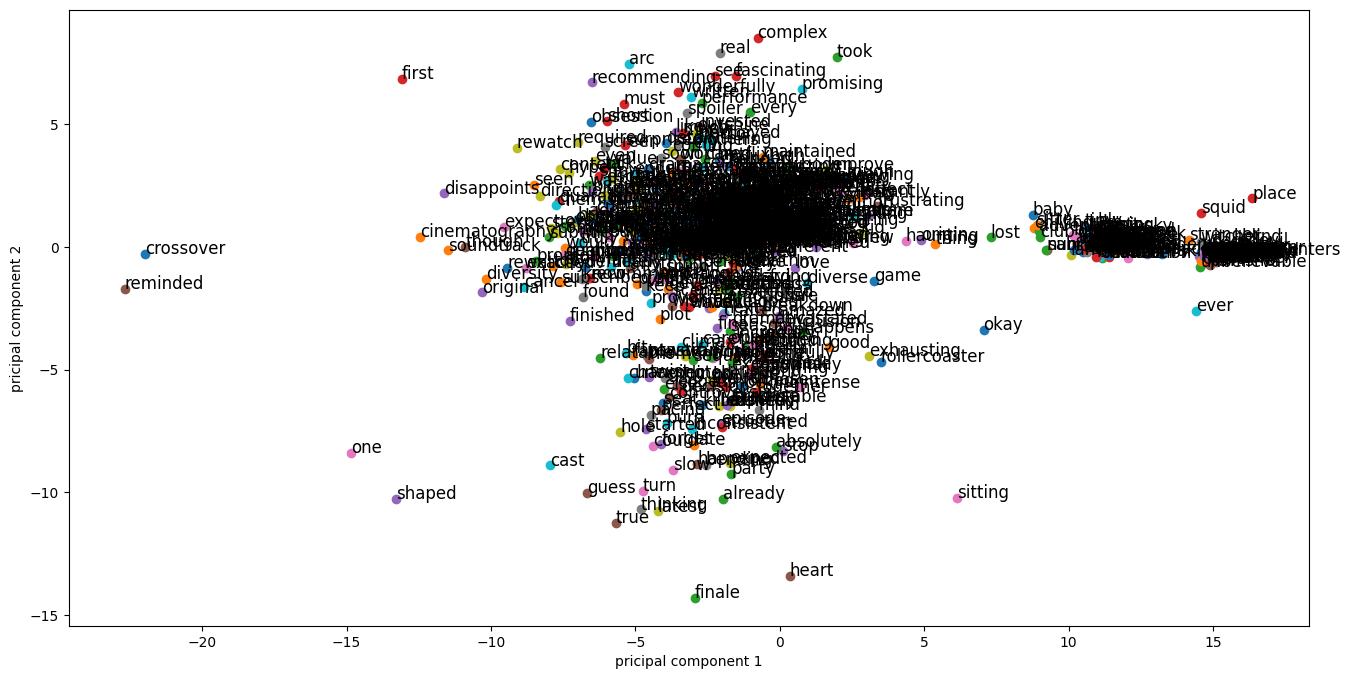

In [165]:
plt.figure(figsize=(16, 8))
for i, word in enumerate(custom_model.wv.index_to_key):
    # print(i,word)
    plt.scatter(data_pca[i,0], data_pca[i,1])
    # plt.annotate(word, (data_pca[i,0], data_pca[i,1]))
    plt.text(data_pca[i, 0], data_pca[i, 1], word, fontsize=12)
plt.xlabel("pricipal component 1")
plt.ylabel("pricipal component 2")